###Upload Image named IITHyd_logo.png
###Upload data_batch_1 from cifar-dataset

In [1]:
import numpy as np
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Problem 1

In [2]:
def refl_padding(img, ker):
    img1 = img.copy()
    a = img.shape[0]
    b = img.shape[1]
    c = img.shape[2]
    a1 = ker.shape[0]
    b1 = ker.shape[1]
    a2 = a+(2*a1)-2
    b2 = b+(2*b1)-2
    img2 = np.zeros((a2, b2, c))
    for k in range(c):
        for i in range(a1-1, a2-a1+1):
            for j in range(b1-1, b2-b1+1):
                img2[i][j][k] = img1[i-(a1)+1][j-(b1)+1][k]
    for k in range(c):
        m = 1
        for i in range(a1-2, -1, -1):
            for j in range(b1-1, b2-b1+1):
                img2[i][j][k] = img2[i+m][j][k]
            m = m+2
        m = 1
        for i in range(a2-a1+1, a2):
            for j in range(b1-1, b2-b1+1):
                img2[i][j][k] = img2[i-m][j][k]
            m = m+2
    for k in range(c):
        m = 1
        for i in range(b1-2, -1, -1):
            for j in range(a2):
                img2[j][i][k] = img2[j][i+m][k]
            m = m+2
        m = 1
        for i in range(b2-b1+1, b2):
            for j in range(a2):
                img2[j][i][k] = img2[j][i-m][k]
            m = m+2
    return img2

def cut_img(dimg, img, ker):
    a = img.shape[0]
    b = img.shape[1]
    c = dimg.shape[2]
    a1 = dimg.shape[0]
    b1 = dimg.shape[1]
    k = ker.shape[0]
    img1 = np.zeros((a, b, c))
    y = int((k-1)/2)
    for z in range(c):
        for i in range(a):
            for j in range(b):
                if(i+y<a and j+y<b):img1[i, j, z] = dimg[i+y][j+y][z]
    return img1

In [3]:
def activ_fn(act_fn,img):
    #activation functions
    if act_fn == "sigmoid":
        return 1.0/(1+np.exp(-1.0*img))
    elif act_fn == "tanh":
        return np.tanh(img)
    elif act_fn == "ReLU":
        return np.where(img<0,0,img)
    elif act_fn == "PReLU":
        return np.where(img<0,(0.3)*img,img)
    else:
        return img

def padding(pad, img, ker):
    if(pad>0):
        return refl_padding(img,ker)
    else:
        return img

def Conv_Func(img, filt, stride, pad, act_fn):
    img1 = img.copy()
    img = padding(pad, img,filt)
    a = img.shape[0]
    b = img.shape[1]
    n = img.shape[2]
    a1 = filt.shape[0]
    b1 = filt.shape[1]
    #img = padding(pad, img,filt)
    out_img = np.zeros((int((a-a1)/stride)+1 ,int((b-b1)/stride) +1,n))
    for z in range(n):
        a11 = a1
        b11 = b1
        a2 = np.arange(0,a-int(a11)+1,stride)
        b2 = np.arange(0,b-int(b11)+1,stride)
        #Applying the convolution operation.
        for i in a2:
            for j in b2:
                d_img = img[i:i+int(a11),j:j+int(b11),z]
                c_img = d_img*filt[:,:,z]
                c_img = np.sum(c_img)
                
                out_img[int(((i)/stride)),int((j)/stride), z] = activ_fn(act_fn, c_img)
    #print(out_img.shape, img.shape, img1.shape )
    out_img = np.sum(out_img, axis=2)
    #c_img = np.sum(out_img,axis = 2)
    l = out_img
    l = np.reshape(l,(1,(out_img.shape[0])*(out_img.shape[1])))
    l = l.tolist()
    l = l[-1]
    l.sort()
    mini = min(l)
    maxi = max(l)
    img2 = ((out_img-mini)/(maxi-mini))*255
    return img2

The shape of image: (256, 256, 3)


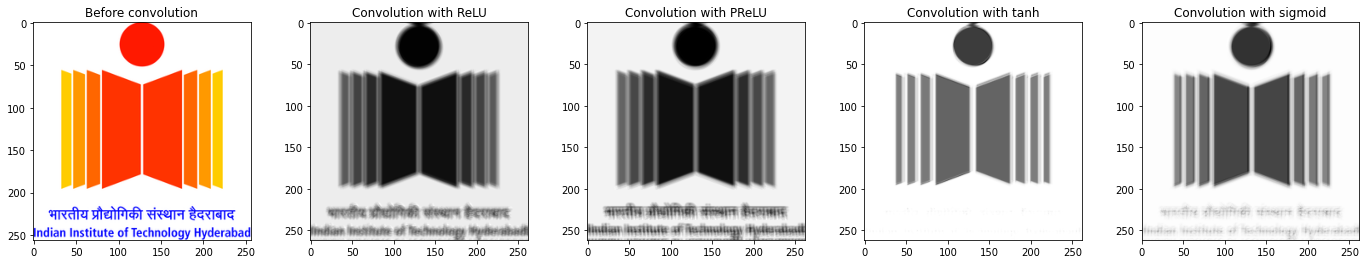

In [4]:
# plot the data
figure, axis = plt.subplots(1, 5,figsize=(24,4))

img = mpimg.imread('/content/IITHyd_logo.png')
print("The shape of image:",img.shape)

axis[0].imshow(img)
axis[0].set_title("Before convolution")

ker = np.random.normal(0.1,0.2,(7,7,3))
img1 = Conv_Func(img,ker,1,1,"ReLU")

axis[1].imshow(img1,"gray")
axis[1].set_title("Convolution with ReLU")

ker = np.random.normal(0.1,0.2,(7,7,3))
img1 = Conv_Func(img,ker,1,1,"PReLU")

axis[2].imshow(img1,"gray")
axis[2].set_title("Convolution with PReLU")

ker = np.random.normal(0.1,0.2,(7,7,3))
img1 = Conv_Func(img,ker,1,1,"tanh")

axis[3].imshow(img1,"gray")
axis[3].set_title("Convolution with tanh")

ker = np.random.normal(0.1,0.2,(7,7,3))
img1 = Conv_Func(img,ker,1,1,"sigmoid")

axis[4].imshow(img1,"gray")
axis[4].set_title("Convolution with sigmoid")

# figure.suptitle('Convolution')
plt.show()

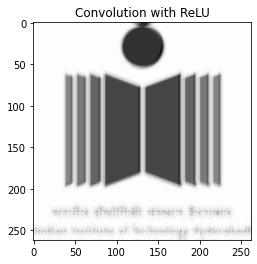

In [5]:
ker = np.random.normal(0.5,0.7,(7,7,3))
fimg = Conv_Func(img,ker,1,1,"ReLU")
plt.imshow(img1,"gray")
plt.title("Convolution with ReLU")
plt.show()

#Problem 2

In [6]:
def pool(act_map, pool_fn, shape, stride=1):
    a = act_map.shape[0]
    b = act_map.shape[1]
    c = act_map.shape[-1]
    s = shape
    s1 = stride
        
    out_map = np.zeros((int((a-s)/s1) + 1, int((b-s)/s1) + 1))
    x = 0
    for i in range(0, a-s+1, s1):
        y = 0
        for j in range(0, b-s+1, s1):
            if(pool_fn == "max"):
                out = np.amax(act_map[i:i+s,j:j+s],(0,1))
                out_map[x,y] = np.reshape(out, (1,1))
            if(pool_fn == "avg"):
                out = np.mean(act_map[i:i+s,j:j+s])
                out_map[x,y]=np.reshape(out, (1,1))
            y = y + 1
        x = x + 1
    return out_map

(262, 262)
(43, 43)


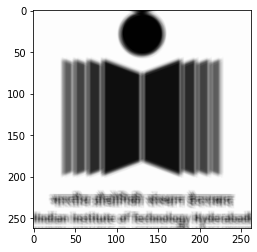

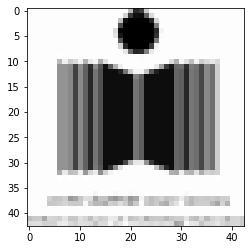

In [7]:
pool_map = pool(fimg, "max", 5,6)
print(fimg.shape)
print(pool_map.shape)
plt.imshow(fimg,"gray")
plt.show()
plt.imshow(pool_map,"gray")
plt.show()

#Problem 3

In [8]:
def Convlayer_Func(img,num_filt,ker_dim,stride,pad,act_fn):
    filt = np.random.normal(0.2,0.3,(num_filt,ker_dim[0],ker_dim[1],ker_dim[2]))
    out=[]
    for i in range(filt.shape[0]):
        out.append(Conv_Func(img,filt[i,:],stride,pad,act_fn))
    return out

(3, 131, 131) 
depth*width*height
Output activation maps are:


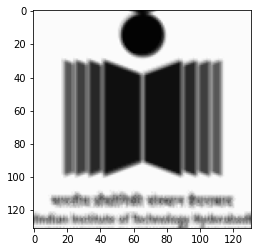

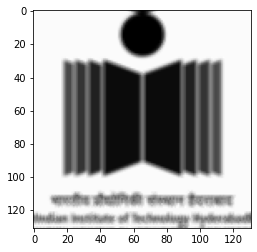

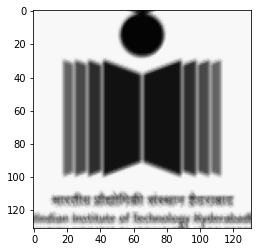

In [9]:
num_of_filters = 3
conv_out = Convlayer_Func(img, num_of_filters,(7,7,3), 2, 1, "ReLU")
conv_out = np.array(conv_out)

print(np.shape(conv_out),'\ndepth*width*height')
print("Output activation maps are:")
for i in range(num_of_filters):
    plt.imshow(conv_out[i],"gray")
    plt.show()

##Yes, The output function have the expected size

#Problem 4

In [10]:
def poollayer(convout,stride,pool_fn,pad = 1):
    out=[]
    #GAP Layer
    if(pool_fn == "GAP"):
      for k in range(convout.shape[0]):
        out.append(np.mean(convout[k,:,:]))
      return out
    for i in range(int(len(convout))):
        out.append(pool(convout[i,:,:],pool_fn,stride,stride))
    return out

Shape of convolution layer output: (3, 131, 131)
Shape of pooling layer output: (3, 32, 32)


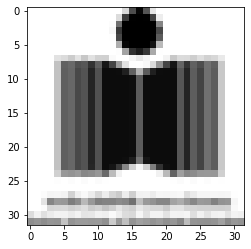

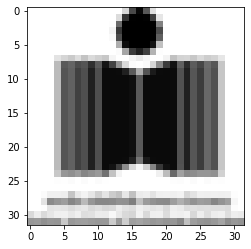

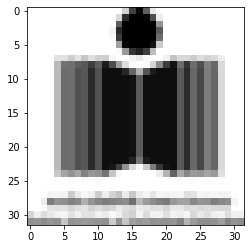

In [11]:
pool_out=poollayer(conv_out,4,pool_fn='avg')
pool_out=np.array(pool_out)
# print(pool_out)
print("Shape of convolution layer output:",np.shape(conv_out))
print("Shape of pooling layer output:",np.shape(pool_out))

for i in range(len(pool_out)):
    plt.imshow(pool_out[i],"gray")
    plt.show()

#Problem 5

In [12]:
def unravel(X, ysize):
    X = X.flatten()
    a = X.shape[0]
    return np.dot(X,np.random.normal(0,1,(a,ysize)))

In [13]:
u_out = unravel(pool_out, 20)
print(u_out)

[ -6387.5683322   15591.07657309   -902.78053624   8873.77299046
 -14154.26569     -3817.57485252 -14054.15373297  -9677.6931745
   5660.2639569   14775.72722835   4929.96808357  10581.45628561
 -11061.85706338  -5258.32013454   4735.72359149  -8976.20451076
   2289.0333176   19626.58472531   2353.06836971  -1584.51361043]


#Question 6

In [14]:
def activ_mlp_fn(act_fn,X):
    
    #activation functions
    if act_fn == "ReLU":
        return np.where(X<0,0,X)
    elif act_fn == "tanh":
        return np.tanh(X)
    elif act_fn == "sigmoid":
        return 1.0/(1+np.exp(-1.0*X))
    elif act_fn == "softmax":
        return (1.0/(np.sum(np.exp(X),axis=1)))*(np.exp(X))

def mlp(n,X,W,b,act_fn):
    y=[]
    z=activ_mlp_fn(act_fn[0],np.array(comp(W[0],X,b[0])))
    y.append(np.array(z))
    for i in range(1,n):
        z=activ_mlp_fn(act_fn[i],np.array(comp(W[i],y[i-1],b[i])))
        y.append(np.array(z))
    z=activ_mlp_fn(act_fn[-1],np.array(comp(W[-1],y[-1],b[-1])))
    y.append(np.array(z))
    y1 = y[-1]
    return y1
def weights(X,n,hsize,ysize):
    W=[]
    b=[]
    W.append(np.random.normal(0,0.01,(X.shape[1],hsize[0])))
    b.append(np.random.normal(0,0.01,(hsize[0],1)))
    for i in range(0,n-1):
        W.append(np.random.normal(0,0.01,(hsize[i],hsize[i+1])))
        b.append(np.random.normal(0,0.01,(hsize[i+1],1)))
    W.append(np.random.normal(0,0.01,(hsize[-1],ysize)))
    b.append(np.random.normal(0,0.01,(ysize,1)))
    return W,b
def comp(w,x,b):
    out = np.dot(x,w)+b.T
    return out

In [15]:
n=3

X = u_out
X = np.reshape(X,(1,X.shape[0]))
print(X.shape)
hsize=[25,25,20]

ysize=15

act_fn = ['ReLU','ReLU','ReLU','softmax']


#with softmax
W,b=weights(X,n,hsize,ysize)

y_pred=mlp(n,X,W,b,act_fn)
print('Y with softmax:')
print (y_pred)
print (np.sum(y_pred))

print()

#without softmax
act_fn = ['ReLU','ReLU','ReLU','ReLU']

y_pred=mlp(n,X,W,b,act_fn)
print('Y without softmax:')
print (y_pred)
print (np.sum(y_pred))

(1, 20)
Y with softmax:
[[0.06781949 0.07152505 0.06682519 0.06569558 0.06447081 0.0661912
  0.06594986 0.06383634 0.06678624 0.06356586 0.06698035 0.06880379
  0.0649065  0.0679568  0.06868695]]
1.0

Y without softmax:
[[0.01822742 0.07142563 0.00345795 0.         0.         0.
  0.         0.         0.00287498 0.         0.00577714 0.03263667
  0.         0.02025005 0.03093705]]
0.18558689399196582


#Problem 7

In [16]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [17]:
data_file =  unpickle("/content/data_batch_1")

In [18]:
labels = data_file[b'labels']
data = data_file[b'data']
print(data.shape)
data = np.reshape(data,(data.shape[0],3*32*32))
x = data
x = np.dstack((x[:, :1024], x[:, 1024:2048], x[:, 2048:]))
x = x.reshape((x.shape[0], 32, 32, 3))

(10000, 3072)


In [19]:
cimg = x[4]
print(cimg.shape)

(32, 32, 3)


In [20]:
def Feed_Forward_Path(c_img):
    num_of_filt = 16
    c1 = Convlayer_Func(c_img,num_of_filt,(3,3,3),2,1,act_fn = "Sigmoid")
    c1 = np.array(c1)
    p1 = poollayer(c1,2,pool_fn= "max")
    p1 = np.array(p1)
    #print(p1.shape)

    num_of_filt = 8
    c2 = Convlayer_Func(p1,num_of_filt,(3,3,8),2,1,act_fn="Sigmoid")
    c2 = np.array(c2)
    p2 = poollayer(c2,2,pool_fn = "max")
    p2 = np.array(p2)

    # GAP Layer
    u1 = poollayer(p2,p2.shape[0],pool_fn = "GAP")
    u1 = np.array(u1)
    
    n=1
    X = u1
    X = np.reshape(X,(1,X.shape[0]))
    #print(X.shape)
    hsize=[25]

    ysize=10

    act_fn = ["sigmoid","softmax"]

    #with softmax
    W,b=weights(X,n,hsize,ysize)

    y_pred=mlp(n,X,W,b,act_fn)
    y_pred = np.array(y_pred)
    return u1,y_pred

In [21]:
u,y = Feed_Forward_Path(cimg)
print("Output vector: ", y)

Output vector:  [[0.10082491 0.09519793 0.09956878 0.09606127 0.09626124 0.10016414
  0.10213278 0.10933763 0.09783247 0.10261886]]


#Problem 8

##8a

In [22]:
limg = {}
for i in range(10):
    limg[i]=[]

for i in range(len(data)):
    limg[labels[i]].append(data[i].reshape(3,32,32).transpose(1,2,0))

In [23]:
# Choosing one image from each class
timg = np.zeros((10,32,32,3))
for i in range(10):
    timg[i,:] = np.array(limg[i][0])
    u,y = Feed_Forward_Path(timg[i])
    print("Output vector of class ",i+1," is: ", y,"\n")

Output vector of class  1  is:  [[0.09652838 0.10201127 0.09904089 0.10470885 0.09953099 0.09572014
  0.095973   0.10060536 0.10129135 0.10458976]] 

Output vector of class  2  is:  [[0.10496079 0.10099604 0.10026387 0.09764415 0.09853322 0.09920251
  0.10341183 0.09725669 0.10059943 0.09713147]] 

Output vector of class  3  is:  [[0.10004006 0.09860964 0.09818538 0.0997008  0.10621342 0.0925592
  0.10449152 0.10206292 0.09998576 0.0981513 ]] 

Output vector of class  4  is:  [[0.10306352 0.09562767 0.10608244 0.10063256 0.09598572 0.10679613
  0.09663434 0.09819978 0.10360007 0.09337776]] 

Output vector of class  5  is:  [[0.10418203 0.09399572 0.1017563  0.10197928 0.09960201 0.09680982
  0.10206339 0.09670916 0.10466449 0.09823781]] 

Output vector of class  6  is:  [[0.09782246 0.09824207 0.09459618 0.09690039 0.10729375 0.10077185
  0.10673748 0.10133108 0.09851262 0.09779212]] 

Output vector of class  7  is:  [[0.10031412 0.09932918 0.10114062 0.10302045 0.10033147 0.09890519
 

###No trend is observed, all values obtained are almost same

##8b

In [24]:
# Choosing 3 images from each class
timg1 = np.zeros((30,32,32,3))
for i in range(30):
    timg1[i,:] = np.array(limg[i//3][i])
    #u,y = ffp(timg1)
lbl = [[i//3]for i in range(30)]
lbl = np.array(lbl)

(30, 8)


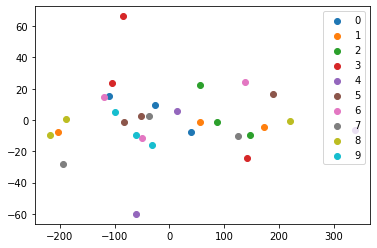

In [25]:
d1 = []
l1 = []
for i in range(10):
    for j in range(3):
        d1.append(timg1[(3*i)+j,:])
        l1.append(lbl[3*i+j])
d1 = np.array(d1)
l1 = np.array(l1)
ans = []
for i in range(30):
    u,y = Feed_Forward_Path(d1[i,:])
    ans.append(np.array(u))
ans = np.array(ans)
print(ans.shape)
X_1 = PCA(n_components=2).fit_transform(ans)
for i in range(10):
    plt.scatter(X_1[3*i:3*(i+1),0],X_1[3*i:3*(i+1),1],label = "%i"%i)
    
    plt.legend()
plt.show()